In [10]:
import os
import os.path as path

from tqdm.notebook import tqdm

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
# import torch.distributions as distributions

from torch.utils.data import DataLoader, Dataset, random_split

import torchaudio
import torchaudio.functional as audioF
import torchaudio.transforms as audioT

import matplotlib.pyplot as pplot

In [3]:
audio_file = "../datasets/DEAM/audio/10.mp3"

In [5]:
(X, sr) = torchaudio.load(audio_file)

In [81]:
class MLayer(nn.Module):
    """
    
    """
    def __init__(self, sample_rate, f_center, bins):
        super(MLayer, self).__init__()
        self.sample_rate = sample_rate
        self.f_center = f_center
        
#         self.size_in, self.size_out = size_in, size_out
#         weights = torch.Tensor(size_out, size_in)
#         self.weights = nn.Parameter(weights)  # nn.Parameter is a Tensor that's a module parameter.
#         bias = torch.Tensor(size_out)
#         self.bias = nn.Parameter(bias)

#         # initialize weights and biases
#         nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init
#         fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
#         bound = 1 / math.sqrt(fan_in)
#         nn.init.uniform_(self.bias, -bound, bound)  # bias init

    def forward(self, x):
        x = audioF.bandpass_biquad(x, self.sample_rate, self.f_center)
        return x

In [82]:
def make_signal(amplitude=1, sample_rate=44100, duration=1.0, frequency=440.0):
    t = torch.arange(sample_rate*duration) / sample_rate
    signal = amplitude * torch.sin(2 * np.pi * frequency * t)
    return signal

In [105]:
X = make_signal(amplitude=1, sample_rate=100, duration=5.0, frequency=1.0)

In [118]:
l = MLayer(100, f_center=100, bins=20)

In [119]:
y = l(X)

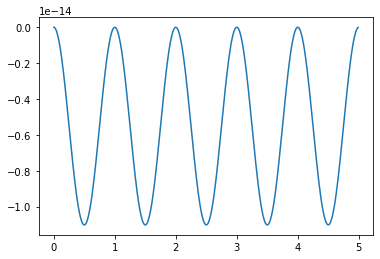

In [120]:
pplot.plot(np.arange(0, 5*100)/100, y)

In [146]:
def make_scale(scale_count=9, ref=440.0, ref_pos=57):
    a = torch.pow(torch.Tensor([2]), torch.Tensor([1/12]))
    l = torch.arange(0, scale_count*12) - ref_pos
    fx = ref * torch.pow(a, l)
    return fx

In [147]:
make_scale()

tensor([  16.3516,   17.3239,   18.3540,   19.4454,   20.6017,   21.8267,
          23.1246,   24.4997,   25.9565,   27.4999,   29.1352,   30.8676,
          32.7031,   34.6478,   36.7080,   38.8908,   41.2034,   43.6535,
          46.2492,   48.9993,   51.9130,   54.9999,   58.2704,   61.7353,
          65.4063,   69.2956,   73.4161,   77.7816,   82.4068,   87.3069,
          92.4985,   97.9987,  103.8261,  109.9999,  116.5408,  123.4707,
         130.8127,  138.5912,  146.8323,  155.5634,  164.8136,  174.6140,
         184.9971,  195.9976,  207.6522,  219.9999,  233.0818,  246.9415,
         261.6255,  277.1825,  293.6647,  311.1269,  329.6275,  349.2282,
         369.9944,  391.9954,  415.3047,  440.0000,  466.1638,  493.8834,
         523.2512,  554.3654,  587.3297,  622.2541,  659.2553,  698.4567,
         739.9892,  783.9912,  830.6098,  880.0005,  932.3281,  987.7672,
        1046.5029, 1108.7314, 1174.6600, 1244.5089, 1318.5114, 1396.9142,
        1479.9791, 1567.9833, 1661.220

In [162]:
loss = torch.nn.CrossEntropyLoss()
inx = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(inx, target)

In [166]:
torch.empty(3, dtype=torch.long).random_(5)

tensor([1, 1, 3])